In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [49]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [24]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

print(last_date)

('2017-08-23',)


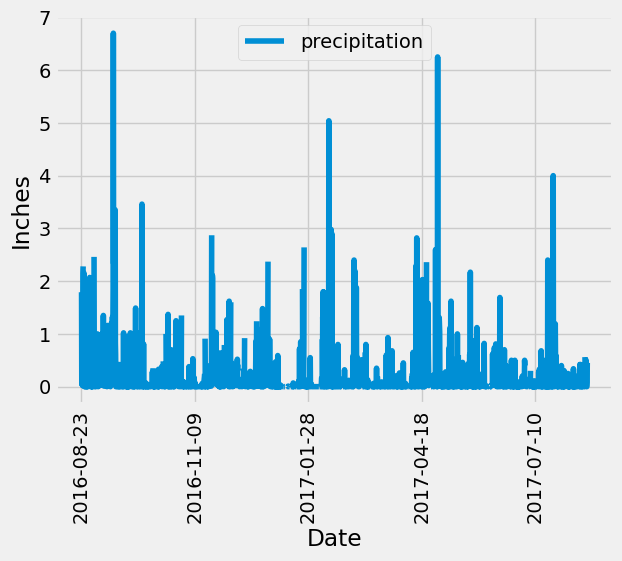

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
datetime_object = dt.datetime.strptime(str(last_date[0]), '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
prev_year = datetime_object - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query.all(), columns=["date", "precipitation"])

# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind="line", x="date", y="precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.show()

In [72]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_prcp = df['precipitation']
df_prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [75]:
# Design a query to calculate the total number of stations in the dataset
station_number = session.query(station.station).count()
print(station_number)

9


In [97]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = (session.query(measurement.station, func.count(measurement.id).label("Station Activity")).group_by(measurement.station)).all()
st_act_sort = sorted(station_activity, key=lambda x:x[1], reverse=True)
for ele in st_act_sort:
    print(ele)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [107]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = st_act_sort[0][0]
#print(most_active)

most_active_station_query = session.query(
    func.min(measurement.tobs),
    func.max(measurement.tobs),
    func.avg(measurement.tobs),
).filter(measurement.station == 'USC00519281').all()

print(most_active_station_query)



USC00519281
[(54.0, 85.0, 71.66378066378067)]


Text(0, 0.5, 'Frquency')

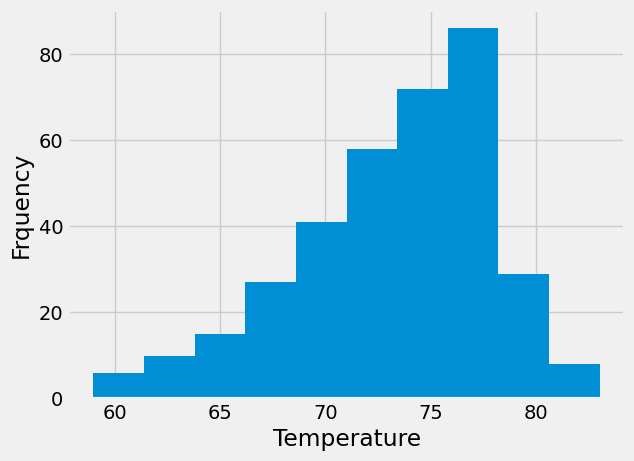

In [127]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
datetime_object = dt.datetime.strptime(str(last_date[0]), '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
prev_year = datetime_object - dt.timedelta(days=365)

temp_query = session.query(measurement.tobs).filter(measurement.station == most_active).filter(measurement.date >= prev_year )

# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_df = pd.DataFrame(temp_query.all(), columns=["Temperature"])

# Sort the dataframe by date
temp_df = temp_df.sort_values(by="Temperature")

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(temp_df)
plt.xlabel("Temperature")
plt.ylabel("Frquency")


# Close Session

In [128]:
# Close Session
session.close()

In [1]:
from flask import Flask

In [2]:
app = Flask(__name__)
@app.route("/")
def hello_world():
    return "Hello, world!"

